In [1]:
#Connect to GDrive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Specify file paths and load them into DataFrames
import pandas as pd
Lithuanian=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Research Project Dataset.xlsx')
df_Lithuanian=pd.DataFrame(Lithuanian)
Mexican=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Research Project/Updated Mexican Research Dataset.xlsx')
df_Mexican=pd.DataFrame(Mexican)

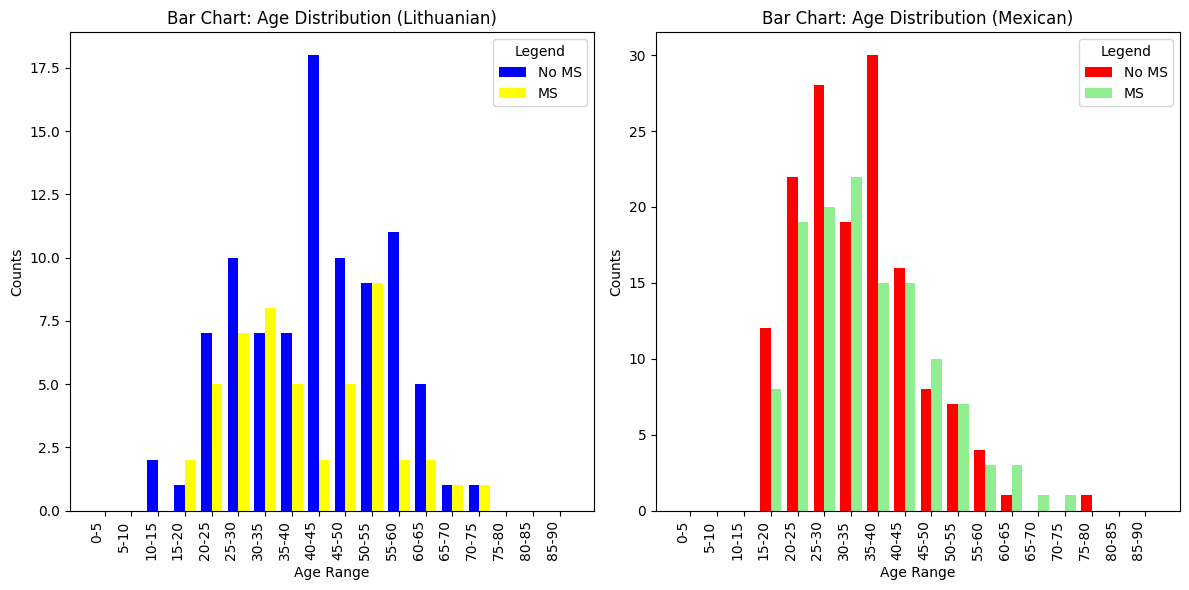

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Define age ranges
age_ranges = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30, 35),
              (35, 40), (40, 45), (45, 50), (50, 55), (55, 60), (60, 65), (65, 70),
              (70, 75), (75, 80), (80, 85), (85, 90)]

# Calculate counts for each age range and MS in Lithuanian dataset
lithuanian_age_range_counts = []
for age_range in age_ranges:
    counts = df_Lithuanian[
        (df_Lithuanian['Age'] >= age_range[0]) & (df_Lithuanian['Age'] < age_range[1])
    ].groupby('MS').size().reindex([0, 1], fill_value=0).values.tolist()
    lithuanian_age_range_counts.append(counts)

# Calculate counts for each age range and MS in Mexican dataset
mexican_age_range_counts = []
for age_range in age_ranges:
    counts = df_Mexican[
        (df_Mexican['Age'] >= age_range[0]) & (df_Mexican['Age'] < age_range[1])
    ].groupby('MS').size().reindex([0, 1], fill_value=0).values.tolist()
    mexican_age_range_counts.append(counts)

# Set bar widths
bar_width = 0.4

# Set bar positions on x-axis
x = np.arange(len(age_ranges))

# Plot bar charts for age ranges in Lithuanian dataset
ax1 = axs[0]
ax1.bar(x - bar_width / 2, [counts[0] for counts in lithuanian_age_range_counts], width=bar_width, label='No MS', color='blue')
ax1.bar(x + bar_width / 2, [counts[1] for counts in lithuanian_age_range_counts], width=bar_width, label='MS', color='yellow')
ax1.set_xticks(x)
ax1.set_xticklabels([f"{age_range[0]}-{age_range[1]}" for age_range in age_ranges], rotation=90, ha='right')
ax1.set_xlabel("Age Range")
ax1.set_ylabel("Counts")
ax1.set_title("Bar Chart: Age Distribution (Lithuanian)")
ax1.legend(title="Legend", labels=["No MS", "MS"])

# Plot bar charts for age ranges in Mexican dataset
ax2 = axs[1]
ax2.bar(x - bar_width / 2, [counts[0] for counts in mexican_age_range_counts], width=bar_width, label='No MS', color='red')
ax2.bar(x + bar_width / 2, [counts[1] for counts in mexican_age_range_counts], width=bar_width, label='MS', color='lightgreen')
ax2.set_xticks(x)
ax2.set_xticklabels([f"{age_range[0]}-{age_range[1]}" for age_range in age_ranges], rotation=90, ha='right')
ax2.set_xlabel("Age Range")
ax2.set_ylabel("Counts")
ax2.set_title("Bar Chart: Age Distribution (Mexican)")
ax2.legend(title="Legend", labels=["No MS", "MS"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the merged figure
plt.show()


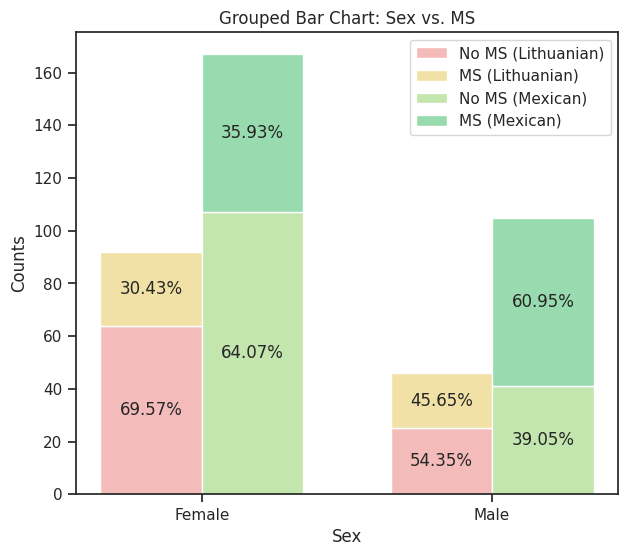

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Specify variables
df_Lithuanian['Sex'] = df_Lithuanian['Sex'].replace({0: "Female", 1: "Male"})
df_Mexican['Sex'] = df_Mexican['Sex'].replace({0: "Female", 1: "Male"})

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette(["#f4bbbb", "#f1e1a6","#c3e5ae", "#97dbae"])

# Data
x = np.arange(2)
y1 = [df_Lithuanian[(df_Lithuanian['Sex'] == "Female") & (df_Lithuanian['MS'] == 0)].shape[0],
      df_Lithuanian[(df_Lithuanian['Sex'] == "Male") & (df_Lithuanian['MS'] == 0)].shape[0]]  # Lithuanian dataset: counts for Female and Male without MS
y2 = [df_Lithuanian[(df_Lithuanian['Sex'] == "Female") & (df_Lithuanian['MS'] == 1)].shape[0],
      df_Lithuanian[(df_Lithuanian['Sex'] == "Male") & (df_Lithuanian['MS'] == 1)].shape[0]]  # Lithuanian dataset: counts for Female and Male with MS
y3 = [df_Mexican[(df_Mexican['Sex'] == "Female") & (df_Mexican['MS'] == 0)].shape[0],
      df_Mexican[(df_Mexican['Sex'] == "Male") & (df_Mexican['MS'] == 0)].shape[0]]  # Mexican dataset: counts for Female and Male without MS
y4 = [df_Mexican[(df_Mexican['Sex'] == "Female") & (df_Mexican['MS'] == 1)].shape[0],
      df_Mexican[(df_Mexican['Sex'] == "Male") & (df_Mexican['MS'] == 1)].shape[0]]  # Mexican dataset: counts for Female and Male with MS
width = 0.35

# Set the figure size
plt.figure(figsize=(7, 6))

# Plot grouped bar charts
plt.bar(x - width/2, y1, width=width, label='No MS (Lithuanian)')
plt.bar(x - width/2, y2, width=width, bottom=y1, label='MS (Lithuanian)')
plt.bar(x + width/2, y3, width=width, label='No MS (Mexican)')
plt.bar(x + width/2, y4, width=width, bottom=y3, label='MS (Mexican)')

# Calculate percentages for each segment
percentage_y1 = [y1[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y2 = [y2[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y3 = [y3[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]
percentage_y4 = [y4[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]

# Add percentages inside the bars
for i in range(len(x)):
    plt.text(x[i] - width/2, y1[i]/2, f'{percentage_y1[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] - width/2, y1[i] + y2[i]/2, f'{percentage_y2[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i]/2, f'{percentage_y3[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i] + y4[i]/2, f'{percentage_y4[i]:.2f}%', ha='center', va='center')


# Plot labels and title
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.title('Grouped Bar Chart: Sex vs. MS')

# Set x-axis tick labels
plt.xticks(x, ['Female', 'Male'])

# Add a legend
plt.legend()

# Display plot
plt.show()


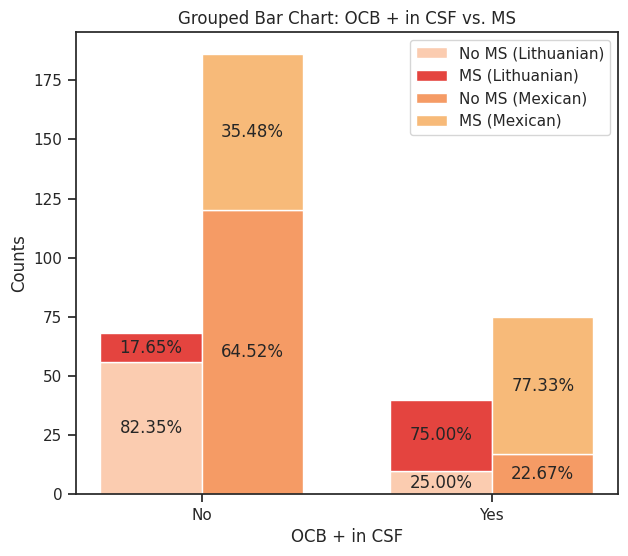

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  Specify variables
df_Lithuanian['OCB + in CSF'] = df_Lithuanian['OCB + in CSF'].replace({1: "Yes", 0: "No"})
df_Mexican['OCB + in CSF'] = df_Mexican['OCB + in CSF'].replace({1: "Yes", 0: "No"})

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette(["#fbccb0", "#e4443f", "#f59b65", "#f7ba79"])

# Data
x = np.arange(2)
y1 = [df_Lithuanian[(df_Lithuanian['OCB + in CSF'] == "No") & (df_Lithuanian['MS'] == 0)].shape[0],
      df_Lithuanian[(df_Lithuanian['OCB + in CSF'] == "Yes") & (df_Lithuanian['MS'] == 0)].shape[0]]  # Lithuanian dataset: counts for No and Yes without OCB + in CSF
y2 = [df_Lithuanian[(df_Lithuanian['OCB + in CSF'] == "No") & (df_Lithuanian['MS'] == 1)].shape[0],
      df_Lithuanian[(df_Lithuanian['OCB + in CSF'] == "Yes") & (df_Lithuanian['MS'] == 1)].shape[0]]  # Lithuanian dataset: counts for No and Yes with OCB + in CSF
y3 = [df_Mexican[(df_Mexican['OCB + in CSF'] == "No") & (df_Mexican['MS'] == 0)].shape[0],
      df_Mexican[(df_Mexican['OCB + in CSF'] == "Yes") & (df_Mexican['MS'] == 0)].shape[0]]  # Mexican dataset: counts for No and Yes without OCB + in CSF
y4 = [df_Mexican[(df_Mexican['OCB + in CSF'] == "No") & (df_Mexican['MS'] == 1)].shape[0],
      df_Mexican[(df_Mexican['OCB + in CSF'] == "Yes") & (df_Mexican['MS'] == 1)].shape[0]]  # Mexican dataset: counts for No and Yes with OCB + in CSF
width = 0.35

# Set the figure size
plt.figure(figsize=(7, 6))

# Plot grouped bar charts
plt.bar(x - width/2, y1, width=width, label='No MS (Lithuanian)')
plt.bar(x - width/2, y2, width=width, bottom=y1, label='MS (Lithuanian)')
plt.bar(x + width/2, y3, width=width, label='No MS (Mexican)')
plt.bar(x + width/2, y4, width=width, bottom=y3, label='MS (Mexican)')

# Calculate percentages for each segment
percentage_y1 = [y1[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y2 = [y2[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y3 = [y3[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]
percentage_y4 = [y4[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]

# Add percentages inside the bars
for i in range(len(x)):
    plt.text(x[i] - width/2, y1[i]/2, f'{percentage_y1[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] - width/2, y1[i] + y2[i]/2, f'{percentage_y2[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i]/2, f'{percentage_y3[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i] + y4[i]/2, f'{percentage_y4[i]:.2f}%', ha='center', va='center')


# Plot labels and title
plt.xlabel('OCB + in CSF')
plt.ylabel('Counts')
plt.title('Grouped Bar Chart: OCB + in CSF vs. MS')

# Set x-axis tick labels
plt.xticks(x, ['No', 'Yes'])

# Add a legend
plt.legend()

# Display plot
plt.show()


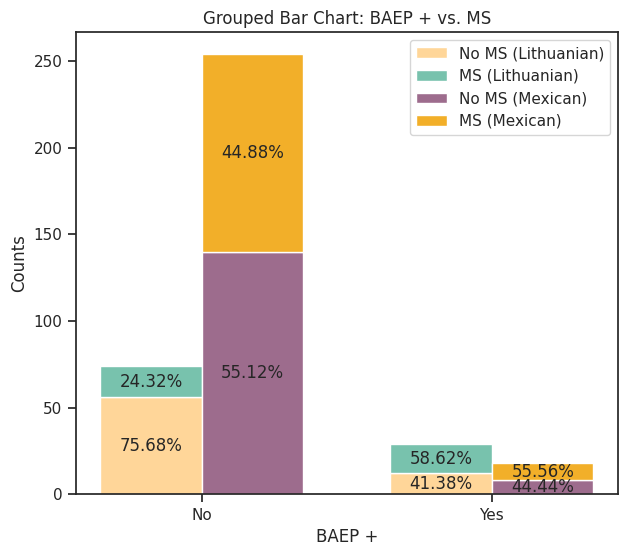

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  Specify variables
df_Lithuanian['BAEP +'] = df_Lithuanian['BAEP +'].replace({1: "Yes", 0: "No"})
df_Mexican['BAEP +'] = df_Mexican['BAEP +'].replace({1: "Yes", 0: "No"})

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette(["#FFD699", "#78C2AD", "#9D6C8D", "#F2AF29"])

# Data
x = np.arange(2)
y1 = [df_Lithuanian[(df_Lithuanian['BAEP +'] == "No") & (df_Lithuanian['MS'] == 0)].shape[0],
      df_Lithuanian[(df_Lithuanian['BAEP +'] == "Yes") & (df_Lithuanian['MS'] == 0)].shape[0]]  # Lithuanian dataset: counts for No and Yes without MS
y2 = [df_Lithuanian[(df_Lithuanian['BAEP +'] == "No") & (df_Lithuanian['MS'] == 1)].shape[0],
      df_Lithuanian[(df_Lithuanian['BAEP +'] == "Yes") & (df_Lithuanian['MS'] == 1)].shape[0]]  # Lithuanian dataset: counts for No and Yes with MS
y3 = [df_Mexican[(df_Mexican['BAEP +'] == "No") & (df_Mexican['MS'] == 0)].shape[0],
      df_Mexican[(df_Mexican['BAEP +'] == "Yes") & (df_Mexican['MS'] == 0)].shape[0]]  # Mexican dataset: counts for No and Yes without MS
y4 = [df_Mexican[(df_Mexican['BAEP +'] == "No") & (df_Mexican['MS'] == 1)].shape[0],
      df_Mexican[(df_Mexican['BAEP +'] == "Yes") & (df_Mexican['MS'] == 1)].shape[0]]  # Mexican dataset: counts for No and Yes with MS
width = 0.35

# Set the figure size
plt.figure(figsize=(7, 6))

# Plot grouped bar charts
plt.bar(x - width/2, y1, width=width, label='No MS (Lithuanian)')
plt.bar(x - width/2, y2, width=width, bottom=y1, label='MS (Lithuanian)')
plt.bar(x + width/2, y3, width=width, label='No MS (Mexican)')
plt.bar(x + width/2, y4, width=width, bottom=y3, label='MS (Mexican)')

# Calculate percentages for each segment
percentage_y1 = [y1[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y2 = [y2[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y3 = [y3[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]
percentage_y4 = [y4[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]

# Add percentages inside the bars
for i in range(len(x)):
    plt.text(x[i] - width/2, y1[i]/2, f'{percentage_y1[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] - width/2, y1[i] + y2[i]/2, f'{percentage_y2[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i]/2, f'{percentage_y3[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i] + y4[i]/2, f'{percentage_y4[i]:.2f}%', ha='center', va='center')


# Plot labels and title
plt.xlabel('BAEP +')
plt.ylabel('Counts')
plt.title('Grouped Bar Chart: BAEP + vs. MS')

# Set x-axis tick labels
plt.xticks(x, ['No', 'Yes'])

# Add a legend
plt.legend()

# Display plot
plt.show()


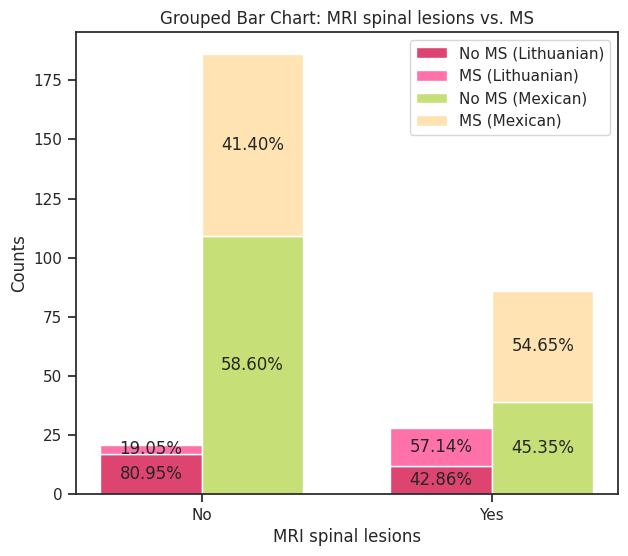

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  Specify variables
df_Lithuanian['MRI spinal lesions'] = df_Lithuanian['MRI spinal lesions'].replace({1: "Yes", 0: "No"})
df_Mexican['MRI spinal lesions'] = df_Mexican['MRI spinal lesions'].replace({1: "Yes", 0: "No"})

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette(["#dd4470", "#fe72a9", "#c6df76", "#ffe3b3"])

# Data
x = np.arange(2)
y1 = [df_Lithuanian[(df_Lithuanian['MRI spinal lesions'] == "No") & (df_Lithuanian['MS'] == 0)].shape[0],
      df_Lithuanian[(df_Lithuanian['MRI spinal lesions'] == "Yes") & (df_Lithuanian['MS'] == 0)].shape[0]]  # Lithuanian dataset: counts for No and Yes without MRI spinal lesions
y2 = [df_Lithuanian[(df_Lithuanian['MRI spinal lesions'] == "No") & (df_Lithuanian['MS'] == 1)].shape[0],
      df_Lithuanian[(df_Lithuanian['MRI spinal lesions'] == "Yes") & (df_Lithuanian['MS'] == 1)].shape[0]]  # Lithuanian dataset: counts for No and Yes with MRI spinal lesions
y3 = [df_Mexican[(df_Mexican['MRI spinal lesions'] == "No") & (df_Mexican['MS'] == 0)].shape[0],
      df_Mexican[(df_Mexican['MRI spinal lesions'] == "Yes") & (df_Mexican['MS'] == 0)].shape[0]]  # Mexican dataset: counts for No and Yes without MRI spinal lesions
y4 = [df_Mexican[(df_Mexican['MRI spinal lesions'] == "No") & (df_Mexican['MS'] == 1)].shape[0],
      df_Mexican[(df_Mexican['MRI spinal lesions'] == "Yes") & (df_Mexican['MS'] == 1)].shape[0]]  # Mexican dataset: counts for No and Yes with MRI spinal lesions
width = 0.35

# Set the figure size
plt.figure(figsize=(7, 6))

# Plot grouped bar charts
plt.bar(x - width/2, y1, width=width, label='No MS (Lithuanian)')
plt.bar(x - width/2, y2, width=width, bottom=y1, label='MS (Lithuanian)')
plt.bar(x + width/2, y3, width=width, label='No MS (Mexican)')
plt.bar(x + width/2, y4, width=width, bottom=y3, label='MS (Mexican)')

# Calculate percentages for each segment
percentage_y1 = [y1[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y2 = [y2[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y3 = [y3[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]
percentage_y4 = [y4[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]

# Add percentages inside the bars
for i in range(len(x)):
    plt.text(x[i] - width/2, y1[i]/2, f'{percentage_y1[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] - width/2, y1[i] + y2[i]/2, f'{percentage_y2[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i]/2, f'{percentage_y3[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i] + y4[i]/2, f'{percentage_y4[i]:.2f}%', ha='center', va='center')


# Plot labels and title
plt.xlabel('MRI spinal lesions')
plt.ylabel('Counts')
plt.title('Grouped Bar Chart: MRI spinal lesions vs. MS')

# Set x-axis tick labels
plt.xticks(x, ['No', 'Yes'])

# Add a legend
plt.legend()

# Display plot
plt.show()


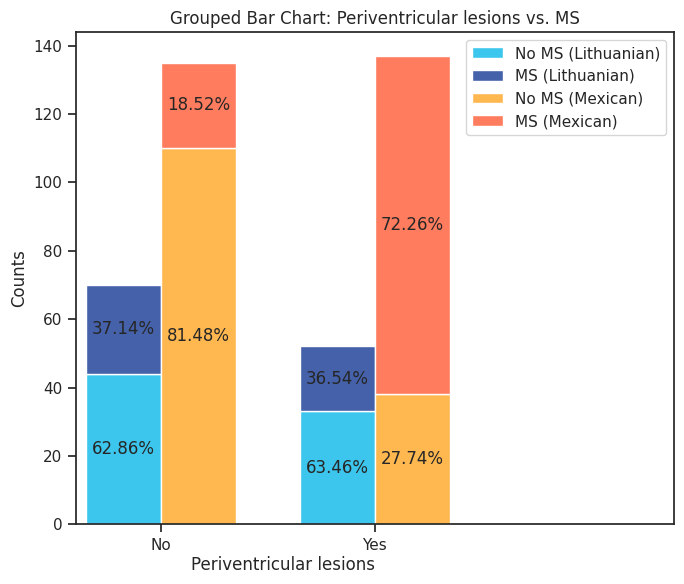

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  Specify variables
df_Lithuanian['Periventricular'] = df_Lithuanian['Periventricular'].replace({1: "Yes", 0: "No"})
df_Mexican['Periventricular'] = df_Mexican['Periventricular'].replace({1: "Yes", 0: "No"})

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette(["#3cc6ed", "#4561aa", "#ffb850", "#ff7c5e"])
# Data
x = np.arange(2)
y1 = [df_Lithuanian[(df_Lithuanian['Periventricular'] == "No") & (df_Lithuanian['MS'] == 0)].shape[0],
      df_Lithuanian[(df_Lithuanian['Periventricular'] == "Yes") & (df_Lithuanian['MS'] == 0)].shape[0]]  # Lithuanian dataset: counts for No and Yes without Periventricular
y2 = [df_Lithuanian[(df_Lithuanian['Periventricular'] == "No") & (df_Lithuanian['MS'] == 1)].shape[0],
      df_Lithuanian[(df_Lithuanian['Periventricular'] == "Yes") & (df_Lithuanian['MS'] == 1)].shape[0]]  # Lithuanian dataset: counts for No and Yes with Periventricular
y3 = [df_Mexican[(df_Mexican['Periventricular'] == "No") & (df_Mexican['MS'] == 0)].shape[0],
      df_Mexican[(df_Mexican['Periventricular'] == "Yes") & (df_Mexican['MS'] == 0)].shape[0]]  # Mexican dataset: counts for No and Yes without Periventricular
y4 = [df_Mexican[(df_Mexican['Periventricular'] == "No") & (df_Mexican['MS'] == 1)].shape[0],
      df_Mexican[(df_Mexican['Periventricular'] == "Yes") & (df_Mexican['MS'] == 1)].shape[0]]  # Mexican dataset: counts for No and Yes with Periventricular
width = 0.35

# Set the figure size
plt.figure(figsize=(7, 6))

# Plot grouped bar charts
plt.bar(x - width/2, y1, width=width, label='No MS (Lithuanian)')
plt.bar(x - width/2, y2, width=width, bottom=y1, label='MS (Lithuanian)')
plt.bar(x + width/2, y3, width=width, label='No MS (Mexican)')
plt.bar(x + width/2, y4, width=width, bottom=y3, label='MS (Mexican)')

# Calculate percentages for each segment
percentage_y1 = [y1[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y2 = [y2[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y3 = [y3[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]
percentage_y4 = [y4[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]

# Add percentages inside the bars
for i in range(len(x)):
    plt.text(x[i] - width/2, y1[i]/2, f'{percentage_y1[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] - width/2, y1[i] + y2[i]/2, f'{percentage_y2[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i]/2, f'{percentage_y3[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i] + y4[i]/2, f'{percentage_y4[i]:.2f}%', ha='center', va='center')

# Plot labels and title
plt.xlabel('Periventricular lesions', ha='right', labelpad=2.5)
plt.ylabel('Counts')
plt.title('Grouped Bar Chart: Periventricular lesions vs. MS')

# Set x-axis tick labels
plt.xticks(x, ['No', 'Yes'])

# Create an empty space on the right side
plt.xlim(-0.4, 2.4)

# Legend position
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Display plot
plt.tight_layout()
plt.show()


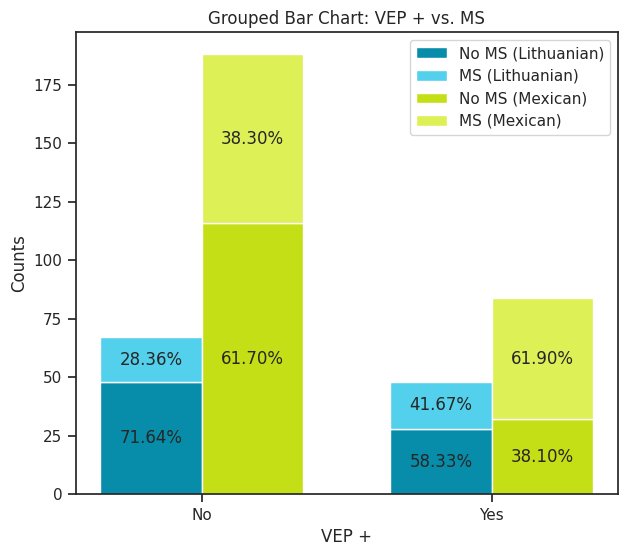

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Specify variables
df_Lithuanian['VEP +'] = df_Lithuanian['VEP +'].replace({1: "Yes", 0: "No"})
df_Mexican['VEP +'] = df_Mexican['VEP +'].replace({1: "Yes", 0: "No"})

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette(["#078daa", "#53d0ec", "#c4df16", "#ddf056"])

# Data
x = np.arange(2)
y1 = [df_Lithuanian[(df_Lithuanian['VEP +'] == "No") & (df_Lithuanian['MS'] == 0)].shape[0],
      df_Lithuanian[(df_Lithuanian['VEP +'] == "Yes") & (df_Lithuanian['MS'] == 0)].shape[0]]  # Lithuanian dataset: counts for No and Yes without VEP +
y2 = [df_Lithuanian[(df_Lithuanian['VEP +'] == "No") & (df_Lithuanian['MS'] == 1)].shape[0],
      df_Lithuanian[(df_Lithuanian['VEP +'] == "Yes") & (df_Lithuanian['MS'] == 1)].shape[0]]  # Lithuanian dataset: counts for No and Yes with VEP +
y3 = [df_Mexican[(df_Mexican['VEP +'] == "No") & (df_Mexican['MS'] == 0)].shape[0],
      df_Mexican[(df_Mexican['VEP +'] == "Yes") & (df_Mexican['MS'] == 0)].shape[0]]  # Mexican dataset: counts for No and Yes without VEP +
y4 = [df_Mexican[(df_Mexican['VEP +'] == "No") & (df_Mexican['MS'] == 1)].shape[0],
      df_Mexican[(df_Mexican['VEP +'] == "Yes") & (df_Mexican['MS'] == 1)].shape[0]]  # Mexican dataset: counts for No and Yes with VEP +
width = 0.35

# Set the figure size
plt.figure(figsize=(7, 6))

# Plot grouped bar charts
plt.bar(x - width/2, y1, width=width, label='No MS (Lithuanian)')
plt.bar(x - width/2, y2, width=width, bottom=y1, label='MS (Lithuanian)')
plt.bar(x + width/2, y3, width=width, label='No MS (Mexican)')
plt.bar(x + width/2, y4, width=width, bottom=y3, label='MS (Mexican)')

# Calculate percentages for each segment
percentage_y1 = [y1[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y2 = [y2[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y3 = [y3[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]
percentage_y4 = [y4[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]

# Add percentages inside the bars
for i in range(len(x)):
    plt.text(x[i] - width/2, y1[i]/2, f'{percentage_y1[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] - width/2, y1[i] + y2[i]/2, f'{percentage_y2[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i]/2, f'{percentage_y3[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i] + y4[i]/2, f'{percentage_y4[i]:.2f}%', ha='center', va='center')


# Plot labels and title
plt.xlabel('VEP +')
plt.ylabel('Counts')
plt.title('Grouped Bar Chart: VEP + vs. MS')

# Set x-axis tick labels
plt.xticks(x, ['No', 'Yes'])

# Add a legend
plt.legend()

# Display plot
plt.show()


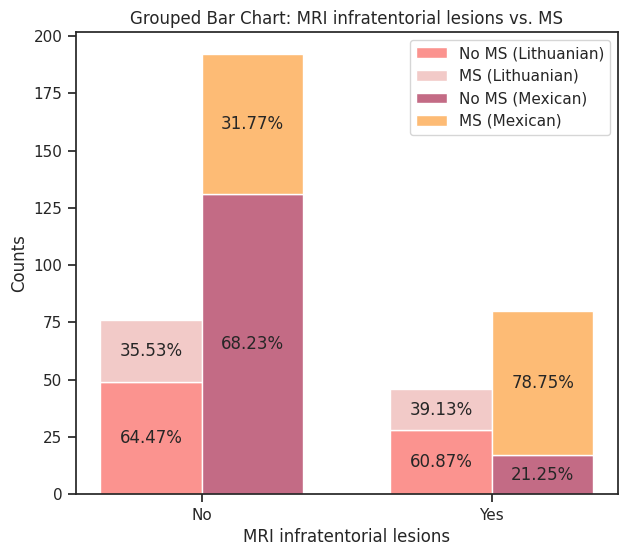

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  Specify variables
df_Lithuanian['MRI infratentorial lesions'] = df_Lithuanian['MRI infratentorial lesions'].replace({1: "Yes", 0: "No"})
df_Mexican['MRI infratentorial lesions'] = df_Mexican['MRI infratentorial lesions'].replace({1: "Yes", 0: "No"})

# Set style and palette for plots
sns.set(style="ticks")
sns.set_palette(["#FB938F", "#F2CAC8", "#C36B85", "#FDBB75"])

# Data
x = np.arange(2)
y1 = [df_Lithuanian[(df_Lithuanian['MRI infratentorial lesions'] == "No") & (df_Lithuanian['MS'] == 0)].shape[0],
      df_Lithuanian[(df_Lithuanian['MRI infratentorial lesions'] == "Yes") & (df_Lithuanian['MS'] == 0)].shape[0]]  # Lithuanian dataset: counts for No and Yes without MRI infratentorial lesions
y2 = [df_Lithuanian[(df_Lithuanian['MRI infratentorial lesions'] == "No") & (df_Lithuanian['MS'] == 1)].shape[0],
      df_Lithuanian[(df_Lithuanian['MRI infratentorial lesions'] == "Yes") & (df_Lithuanian['MS'] == 1)].shape[0]]  # Lithuanian dataset: counts for No and Yes with MRI infratentorial lesions
y3 = [df_Mexican[(df_Mexican['MRI infratentorial lesions'] == "No") & (df_Mexican['MS'] == 0)].shape[0],
      df_Mexican[(df_Mexican['MRI infratentorial lesions'] == "Yes") & (df_Mexican['MS'] == 0)].shape[0]]  # Mexican dataset: counts for No and Yes without MRI infratentorial lesions
y4 = [df_Mexican[(df_Mexican['MRI infratentorial lesions'] == "No") & (df_Mexican['MS'] == 1)].shape[0],
      df_Mexican[(df_Mexican['MRI infratentorial lesions'] == "Yes") & (df_Mexican['MS'] == 1)].shape[0]]  # Mexican dataset: counts for No and Yes with MRI infratentorial lesions
width = 0.35

# Set the figure size
plt.figure(figsize=(7, 6))

# Plot grouped bar charts
plt.bar(x - width/2, y1, width=width, label='No MS (Lithuanian)')
plt.bar(x - width/2, y2, width=width, bottom=y1, label='MS (Lithuanian)')
plt.bar(x + width/2, y3, width=width, label='No MS (Mexican)')
plt.bar(x + width/2, y4, width=width, bottom=y3, label='MS (Mexican)')

# Calculate percentages for each segment
percentage_y1 = [y1[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y2 = [y2[i] / (y1[i] + y2[i]) * 100 for i in range(len(y1))]
percentage_y3 = [y3[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]
percentage_y4 = [y4[i] / (y3[i] + y4[i]) * 100 for i in range(len(y3))]

# Add percentages inside the bars
for i in range(len(x)):
    plt.text(x[i] - width/2, y1[i]/2, f'{percentage_y1[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] - width/2, y1[i] + y2[i]/2, f'{percentage_y2[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i]/2, f'{percentage_y3[i]:.2f}%', ha='center', va='center')
    plt.text(x[i] + width/2, y3[i] + y4[i]/2, f'{percentage_y4[i]:.2f}%', ha='center', va='center')


# Plot labels and title
plt.xlabel('MRI infratentorial lesions')
plt.ylabel('Counts')
plt.title('Grouped Bar Chart: MRI infratentorial lesions vs. MS')

# Set x-axis tick labels
plt.xticks(x, ['No', 'Yes'])

# Add a legend
plt.legend()

# Display plot
plt.show()


#OLD CHARTS BELOW (Ignore)

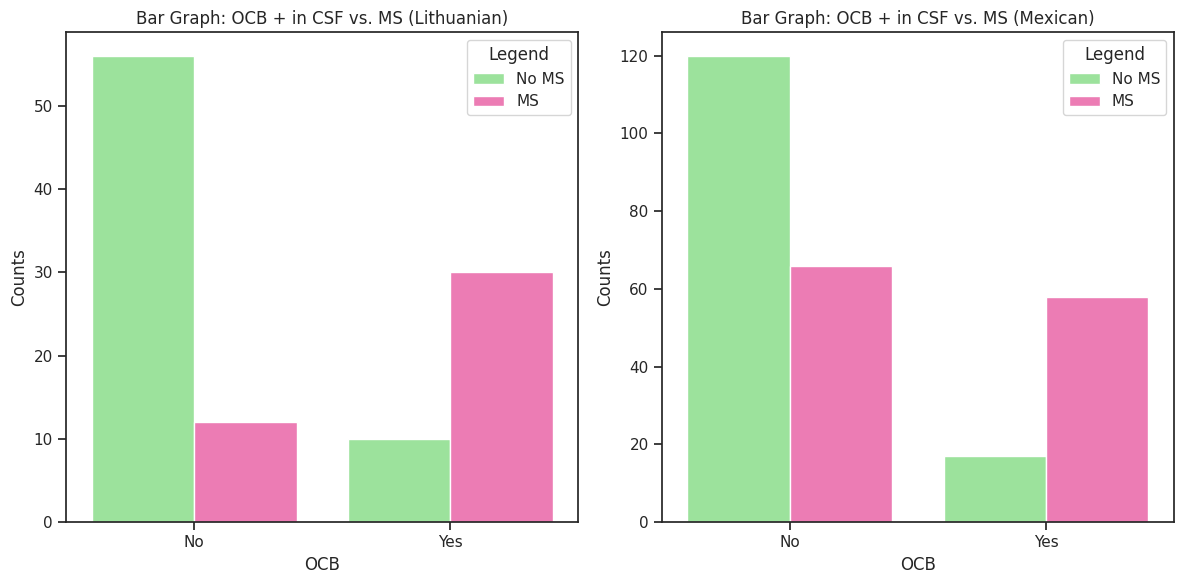

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace values in the 'OCB + in CSF' column
df_Lithuanian['OCB + in CSF'] = df_Lithuanian['OCB + in CSF'].replace({1: "Yes", 0: "No"})
df_Mexican['OCB + in CSF'] = df_Mexican['OCB + in CSF'].replace({1: "Yes", 0: "No"})

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot stacked bar graph for OCB in Lithuanian dataset
sns.countplot(x='OCB + in CSF', hue='MS', data=df_Lithuanian, order=["No", "Yes"],
              hue_order=[0, 1], palette=['lightgreen','hotpink'], ax=ax1)
ax1.set_xlabel("OCB")
ax1.set_ylabel("Counts")
ax1.set_title("Bar Graph: OCB + in CSF vs. MS (Lithuanian)")
ax1.legend(title="Legend", labels=["No MS", "MS"], loc="best")

# Plot stacked bar graph for OCB in Mexican dataset
sns.countplot(x='OCB + in CSF', hue='MS', data=df_Mexican, order=["No", "Yes"],
              hue_order=[0, 1], palette=['lightgreen','hotpink'], ax=ax2)
ax2.set_xlabel("OCB")
ax2.set_ylabel("Counts")
ax2.set_title("Bar Graph: OCB + in CSF vs. MS (Mexican)")
ax2.legend(title="Legend", labels=["No MS", "MS"], loc="best")

# Adjust spacing between subplots
plt.tight_layout()

# Show the merged figure
plt.show()


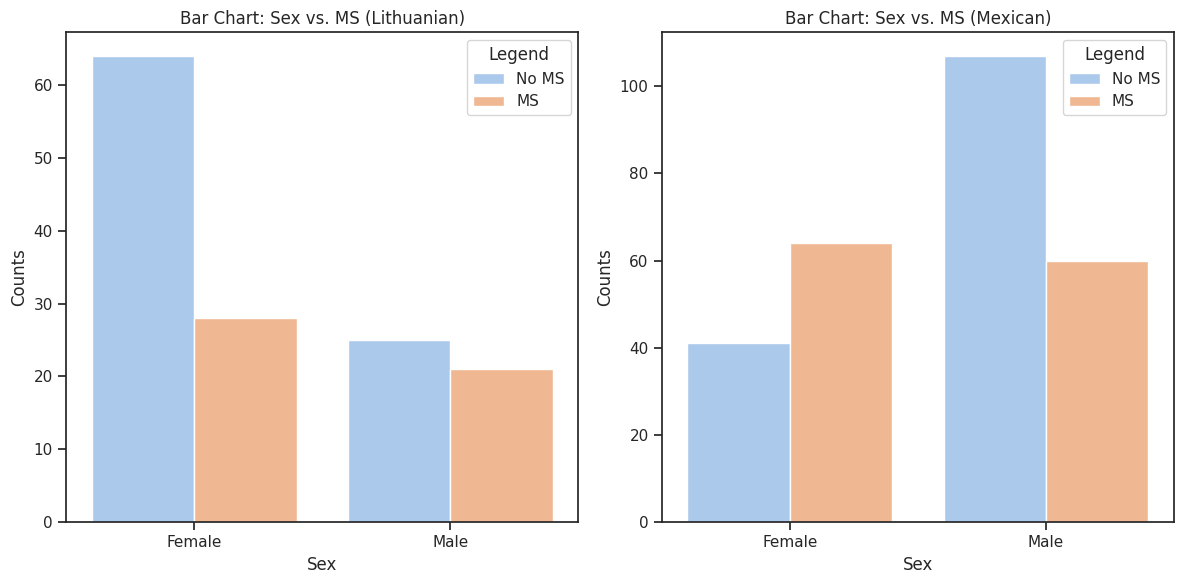

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace values in the 'Sex' column
df_Lithuanian['Sex'] = df_Lithuanian['Sex'].replace({0: "Female", 1: "Male"})
df_Mexican['Sex'] = df_Mexican['Sex'].replace({0: "Female", 1: "Male"})

# Setting style and palette for plots
sns.set(style="ticks")
sns.set_palette("pastel")

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar chart for Sex vs. MS (Lithuanian dataset)
sns.countplot(x='Sex', hue='MS', data=df_Lithuanian, ax=ax1)
ax1.set_ylabel("Counts")
ax1.set_xlabel("Sex")
ax1.set_xticklabels(["Female", "Male"])
ax1.set_title("Bar Chart: Sex vs. MS (Lithuanian)")
ax1.legend(title="Legend", labels=["No MS", "MS"])

# Plot Bar chart for Sex vs. MS (Mexican dataset)
sns.countplot(x='Sex', hue='MS', data=df_Mexican, ax=ax2)
ax2.set_ylabel("Counts")
ax2.set_xlabel("Sex")
ax2.set_xticklabels(["Female", "Male"])
ax2.set_title("Bar Chart: Sex vs. MS (Mexican)")
ax2.legend(title="Legend", labels=["No MS", "MS"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the merged figure
plt.show()


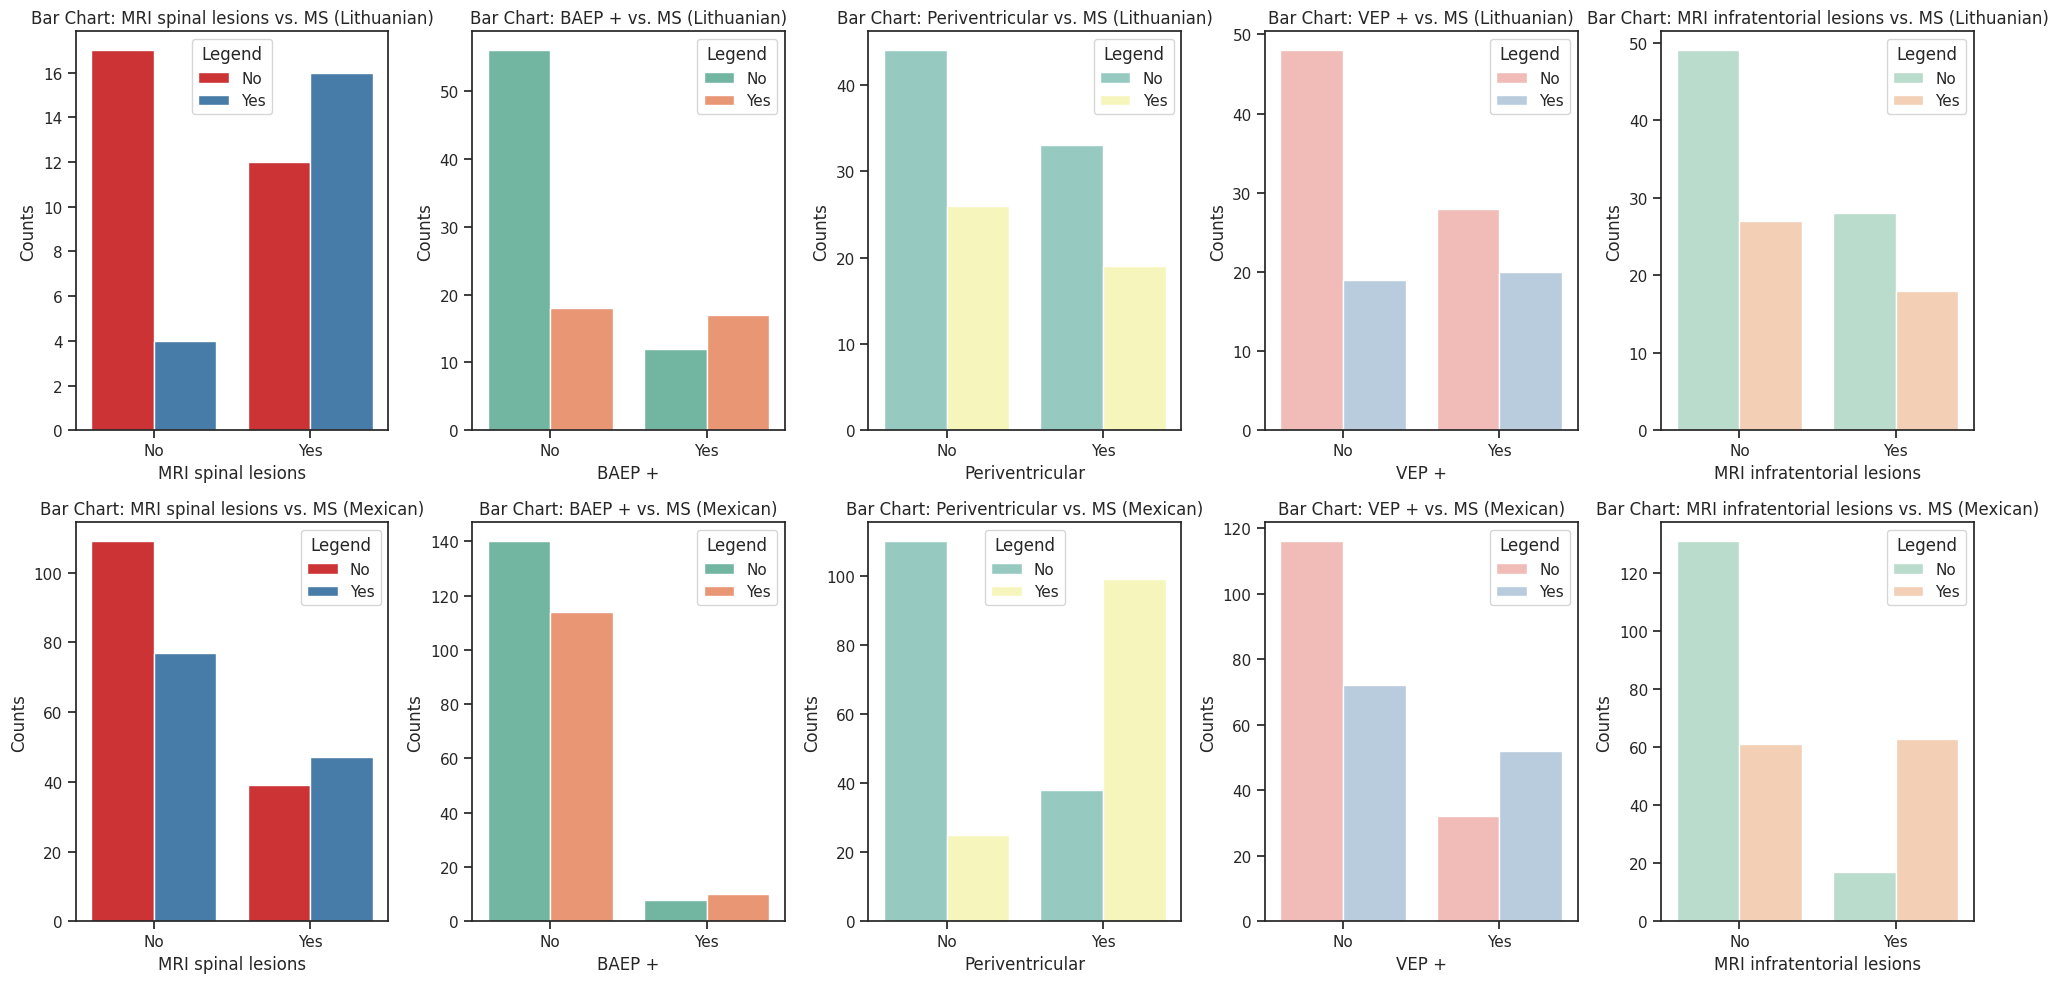

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Variables to plot
variables = ['MRI spinal lesions', 'BAEP +', 'Periventricular', 'VEP +', 'MRI infratentorial lesions']

# Color palette for each variable
color_palette = ['Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2']

# Loop through variables
for i, var in enumerate(variables):
    # Plot Bar chart for variable vs. MS (Lithuanian dataset)
    ax1 = axs[0, i]
    sns.countplot(x=var, hue='MS', data=df_Lithuanian, order=[0, 1],
                  palette=color_palette[i], ax=ax1)
    ax1.set_ylabel("Counts")
    ax1.set_xlabel(var)
    ax1.set_xticklabels(['No', 'Yes'])
    ax1.set_title(f"Bar Chart: {var} vs. MS (Lithuanian)")
    ax1.legend(title="Legend", labels=["No", "Yes"])

    # Plot Bar chart for variable vs. MS (Mexican dataset)
    ax2 = axs[1, i]
    sns.countplot(x=var, hue='MS', data=df_Mexican, order=[0, 1],
                  palette=color_palette[i], ax=ax2)
    ax2.set_ylabel("Counts")
    ax2.set_xlabel(var)
    ax2.set_xticklabels(['No', 'Yes'])
    ax2.set_title(f"Bar Chart: {var} vs. MS (Mexican)")
    ax2.legend(title="Legend", labels=["No", "Yes"])

# Adjust spacing between subplots
plt.tight_layout()

# Show the merged figure
plt.show()
